Kruskal Algorithm Testing Session
(testing in undirected graph)



In [1]:
#required libraries for graph and kruskal algorithm
import networkx as nx
import random
import matplotlib.pyplot as plt

In [20]:
#generate graph
def graph_gen(V, density):
    # Generates a connected graph with V nodes and target density.
    G = nx.Graph()
    G.add_nodes_from(range(V))

    # Calculate the number of edges base on density
    edges_num = int(density * V * (V + 1) / 2)

    # Ensure minimum number of edges for connectivity
    edges_num = max(edges_num, V-1)

    # Generate edges randomly
    edges = set()
    while len(edges) < edges_num:
        u = random.randint(0, V - 1)
        v = random.randint(0, V - 1)
        if u != v and (u, v) not in edges and (v, u) not in edges:
            edges.add((u, v))

    # Add edges to the graph
    G.add_edges_from(edges)

    # Random the weight of edges
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.randint(1, 25)
    # Ensure connectivity
    if not nx.is_connected(G):
        return graph_gen(V, density)

    return G
        
def neg_graph_gen(V, density):
    #Generates a connected graph with V nodes and target density with negative weight.
    G = nx.Graph()
    G.add_nodes_from(range(V))

    # Calculate the number of edges base on density
    edges_num = int(density * V * (V + 1) / 2)

    # Ensure minimum number of edges for connectivity
    edges_num = max(edges_num, V-1)

    # Generate edges randomly
    edges = set()
    while len(edges) < edges_num:
        u = random.randint(0, V - 1)
        v = random.randint(0, V - 1)
        if u != v and (u, v) not in edges and (v, u) not in edges:
            edges.add((u, v))

    # Add edges to the graph
    G.add_edges_from(edges)

    # Random the weight of edges
    for (u, v) in G.edges():
        weight_check = random.randint(-25, 25)
        if weight_check >= 0:
            G.edges[u, v]['weight'] = weight_check + 1
        else:
            G.edges[u, v]['weight'] = weight_check
    # Ensure connectivity
    if not nx.is_connected(G):
        return neg_graph_gen(V, density)
    return G


In [3]:
#Kruskal algorithm
def kruskal_mst(graph):
    """Finds the Minimum Spanning Tree of a weighted graph using Kruskal's algorithm."""
    def look(parent, i):
        """Find the root of the set in which element i belongs."""
        if parent[i] == i:
            return i
        return look(parent, parent[i])

    def apply_union(parent, rank, x, y):
        """Perform the union of two sets."""
        xroot = look(parent, x)
        yroot = look(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    # Graph for MST and total weight of it
    MST = nx.Graph()
    total_weight = 0
    # Sort edges by their weight
    edge_list = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])

    parent = []
    rank = []

    for node in range(len(graph.nodes())):
        parent.append(node)
        rank.append(0)
    
    # If we've already added enough edges to form the MST, break early
    while len(MST.nodes()) < len(graph.nodes()):
        # Process edges in order of their weight
        for u, v, values in edge_list:
            # Find roots of the sets to which u and v belong
            if look(parent, u) != look(parent, v):
                # If u and v are in different sets, add the edge to the MST
                MST.add_edge(u, v, weight=values['weight'])
                apply_union(parent, rank, u, v)
    weight_list = list(MST.edges.data("weight", default=1))
    for i in range(len(weight_list)):
        total_weight += weight_list[i][2]
    return MST, total_weight


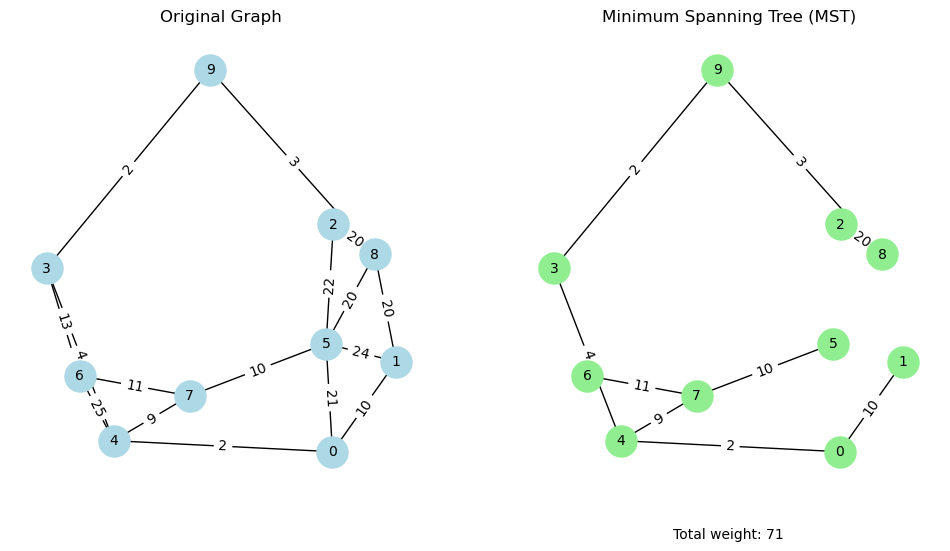

In [4]:
# Generate sparse graph and find MST using Kruskal's algorithm
# Sparse graph condition(undirected graph): A graph with significantly fewer edges than the maximum possible. In other words, Density << 1. 
V = 10
density = 0.3
G = graph_gen(V, density)
MST, total_weight = kruskal_mst(G)

def visualize_graphs(graph, mst):
    """Visualizes the original graph and its MST with edge weights."""
    plt.figure(figsize=(12, 6))

    # Original graph
    plt.subplot(121)
    pos = nx.spring_layout(graph)  # Layout for visualization
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title("Original Graph")

    # MST
    plt.subplot(122)
    nx.draw(mst, pos, with_labels=True, node_color='lightgreen', node_size=500, font_size=10)
    mst_edge_labels = nx.get_edge_attributes(mst, 'weight')
    nx.draw_networkx_edge_labels(mst, pos, edge_labels=mst_edge_labels)
    plt.title("Minimum Spanning Tree (MST)")
    plt.text(0.5, -0.1, f"Total weight: {total_weight}", ha='center', transform=plt.gca().transAxes)

    plt.show()

    
# Visualize graphs
visualize_graphs(G, MST)

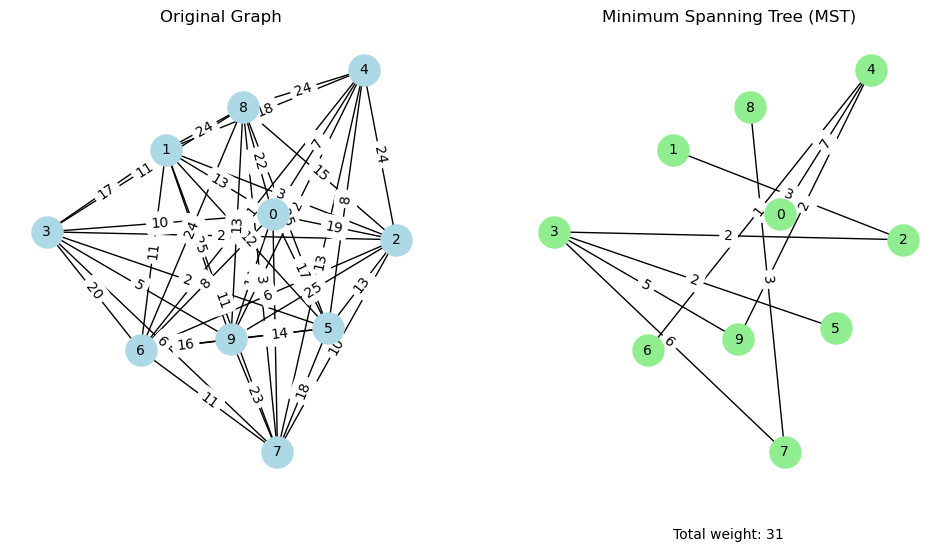

In [5]:
# Generate dense graph and find MST using Kruskal's algorithm
# Dense graph condition(undirected graph): A graph with a number of edges close to the maximum possible. In other words, Density is close to 1.
V = 10
density = 0.8
G = graph_gen(V, density)
MST, total_weight = kruskal_mst(G)

def visualize_graphs(graph, mst):
    """Visualizes the original graph and its MST with edge weights."""
    plt.figure(figsize=(12, 6))

    # Original graph
    plt.subplot(121)
    pos = nx.spring_layout(graph)  # Layout for visualization
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title("Original Graph")

    # MST
    plt.subplot(122)
    nx.draw(mst, pos, with_labels=True, node_color='lightgreen', node_size=500, font_size=10)
    mst_edge_labels = nx.get_edge_attributes(mst, 'weight')
    nx.draw_networkx_edge_labels(mst, pos, edge_labels=mst_edge_labels)
    plt.title("Minimum Spanning Tree (MST)")
    plt.text(0.5, -0.1, f"Total weight: {total_weight}", ha='center', transform=plt.gca().transAxes)

    plt.show()

    
# Visualize graphs
visualize_graphs(G, MST)

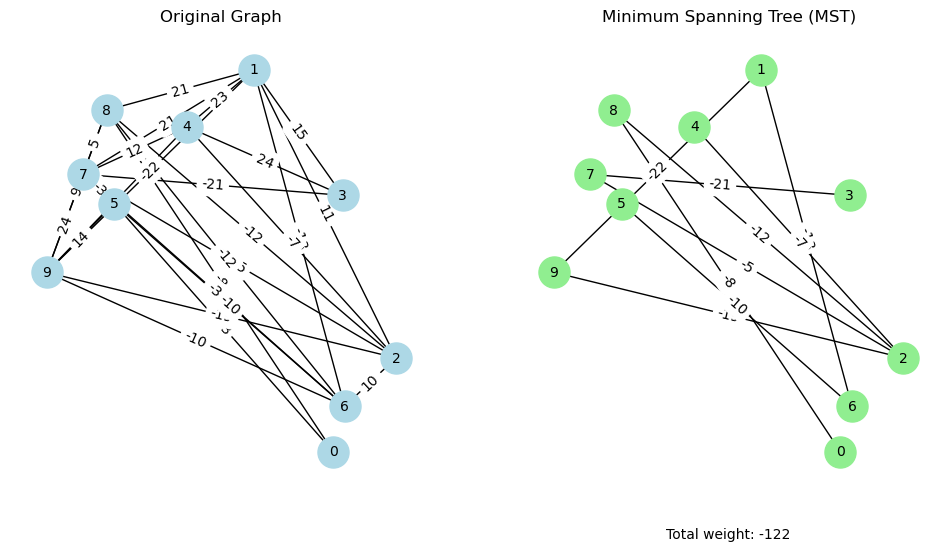

In [18]:
# Generate graph with negative weight and find MST using Kruskal's algorithm
num_nodes = 10
density = 0.5
graph = neg_graph_gen(num_nodes, density)
mst, total_weight = kruskal_mst(graph)

def visualize_graphs(graph, mst):
    """Visualizes the original graph and its MST with edge weights."""
    plt.figure(figsize=(12, 6))

    # Original graph
    plt.subplot(121)
    pos = nx.spring_layout(graph)  # Layout for visualization
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title("Original Graph")

    # MST
    plt.subplot(122)
    nx.draw(mst, pos, with_labels=True, node_color='lightgreen', node_size=500, font_size=10)
    mst_edge_labels = nx.get_edge_attributes(mst, 'weight')
    nx.draw_networkx_edge_labels(mst, pos, edge_labels=mst_edge_labels)
    plt.title("Minimum Spanning Tree (MST)")
    plt.text(0.5, -0.1, f"Total weight: {total_weight}", ha='center', transform=plt.gca().transAxes)

    plt.show()

    
# Visualize graphs
visualize_graphs(graph, mst)